# Reservoir Computing and Mackey-Glass prediction

This notebook is an example of Mackey-Glass prediction using Reservoir Computing, towards an optical implementation.

## Initialization

In [1]:
import numpy as np
import time

from reservoir import Reservoir
import data1D

%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

## Data generation

In [164]:
input_data = data1D.mackey_glass(sequence_length=4000, n_sequence=1)
horizon = 10  # up to how many timesteps in the future we want to predict
output_data = np.zeros(input_data.shape[0:-1] + (horizon,))
for i_step in range(horizon):
    temp = np.roll(input_data, -(i_step+1), axis=1)
    output_data[:, :, i_step] = np.squeeze(np.roll(input_data, -(i_step+1), axis=1))

## Reservoir initialization

In [165]:
b = Reservoir(n_res=1000, input_scale=2, train_method='ridge', train_param=1e1,
              weights_type='complex gaussian', random_projection='simulation',
              activation_fun='phase', activation_param=1, encoding_method='phase',
              input_dim=1, forget=500, parallel_runs=None)

## Reservoir Training

In [166]:
y = output_data
b.fit(input_data, y);

Start of training...
Initialization finished. Elapsed time:
0.09195113182067871
100%|██████████| 4000/4000 [00:03<00:00, 1213.27it/s]
Iterations finished. Elapsed time:
3.391084909439087
Training finished. Elapsed time:
3.74440336227417
Training score:
0.9891550386161994


## Reservoir Validation

In [167]:
input_data = data1D.mackey_glass(sequence_length=1000, n_sequence=1)
output_data = np.zeros(input_data.shape[0:-1] + (horizon,))
for i_step in range(horizon):
    temp = np.roll(input_data, -(i_step+1), axis=1)
    output_data[:, :, i_step] = np.squeeze(np.roll(input_data, -(i_step+1), axis=1))

In [168]:
y = output_data[:, b.forget:, :]
pred_output, valid_score = b.score(input_data, y);

Start of testing...
Initialization finished. Elapsed time:
0.0005464553833007812
100%|██████████| 1000/1000 [00:00<00:00, 1575.55it/s]
Iterations finished. Elapsed time:
0.6387925148010254
Testing finished. Elapsed time:
0.6419658660888672
Testing finished. Elapsed time:
3.74440336227417
Testing score:
0.9457336329468495


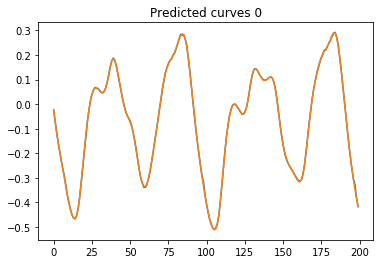

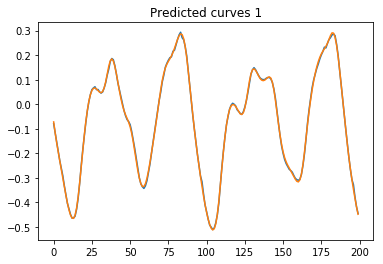

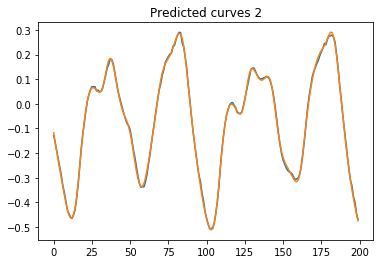

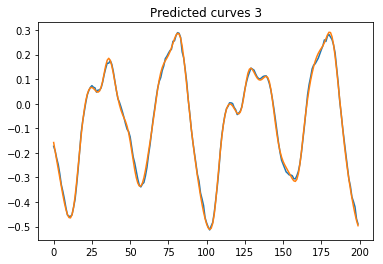

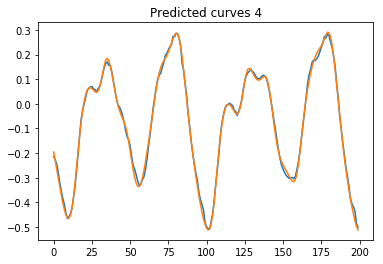

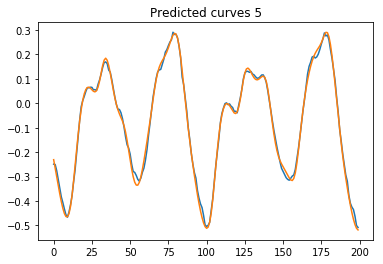

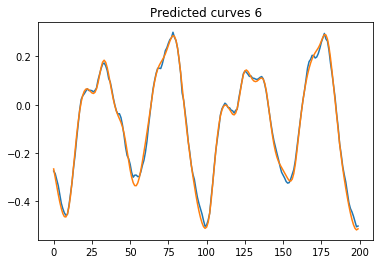

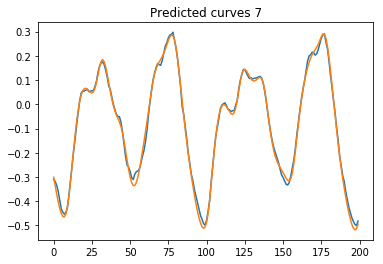

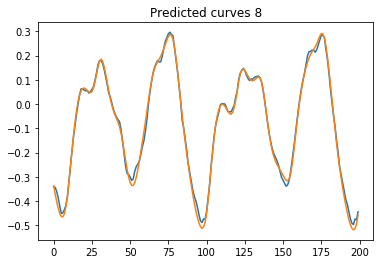

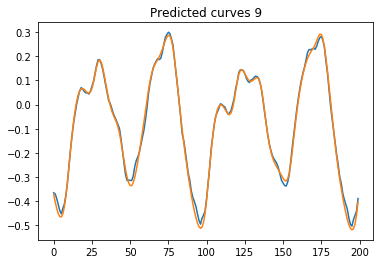

In [169]:
plot_length = 200
for i_fig in range(10):
    plt.figure(i_fig)
    plt.plot(pred_output[:plot_length, i_fig])
    plt.plot(y[0, :plot_length, i_fig])
    plt.title('Predicted curves ' + str(i_fig))
    plt.show()